# Detecting Quantum Errors
- Quantum error correction is used to protect quantum information from errors due to **decoherence and other quantum noise**
- This task is to implement the *bit-flip code* and the *sign-flip code* for quantum circuits

In [2]:
from qiskit import *
import random as random
import numpy as np
import matplotlib as mt
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram
print("Qiskit:",qiskit.__version__)
print("Numpy:",np.__version__)
print("Matplotlib:",mt.__version__)
%matplotlib inline

Qiskit: 0.16.1
Numpy: 1.19.4
Matplotlib: 3.1.1


# Libraries used
- **qiskit** - version : 0.16.1
    - The main library used for the implementation of the given task was *qiskit* by IBM. 
    - Inbuilt methods for the plotting of states, measurements and gate operations were used to implement the tasks given.
- **numpy** - version : 1.19.4 and **random**
    - numpy and random was used for used for random number generation in the sub-task 2 for obtaining the probabilities of error gates.
- **matplotlib** - version : 3.1.1
    - For plotting of the results obtained in the simulation

# Subtask 1
- Creating the Bell State ( a maximally entangled state )
 $$ \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

The Bell State


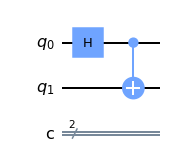

In [2]:
# creating a quantum circuit with 2 quantum and 
# 2 classical bits
Q = QuantumCircuit(2,2) 
Q.h(0) # applying the hadamard gate on Qubit 0
Q.cx(0,1) # applying the controlled-not gate with 
          # control as 0 and target as 1 
print("The Bell State")
Q.draw(output = 'mpl') # visualizing the circuit

- Measuring and visualizing the probabilities of measurement

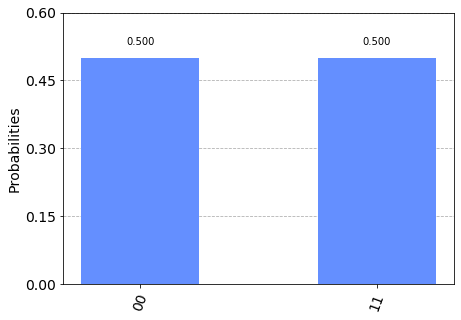

In [3]:
# Plotting on the histogram
Qplot = Q 
Qplot.measure([0,1],[0,1])
counts = execute(Q,backend= Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
plot_histogram(counts)

- We can see that the maximally entangled Bell state has indeed been prepared  

# Subtask 2
- Adding arbitrary *error* gates for each qubit, just before the CNOT gate
- Note : each qubit's channel of transfer is treated **different** and separate error probabilities have been defined for them both
-  **THOUGHT** 
    - Since the number of choices for each qubit is 3 and we have 2 qubits, we would have a total of 9 possible combinations for our gates.
    - We can *map* each gate to a number and then pick that number from a list for each qubit
    - The gate mapped to the number is attached to the qubit with the corresponding probability
    - The *dirichlet* function is used to generate random probabilities which sum up to one 
    - These probability values are passed as **weights** to a choice function which generates the random item from list
- **MAPPING NUMBERS TO GATES** $$1:I$$
$$ 2 : X$$
$$ 3 : Z$$

In [5]:
def gate_params():
    '''RETURNS: a randomly generated 2-tuple consisting of 
       numbers from [1,2,3] which map to a
       unitary quantum gate'''
    
    # pick for the first qubit 
    p1 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p1)
    n1 = random.choices([1,2,3],weights = p1[0],k=1)[0]
    
    # now pick for second qubit 
    p2 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p2)
    n2 = random.choices([1,2,3],weights = p2[0],k=1)[0]
    
    #choice
    print("Numbers chosen are :",n1,n2)
    return (n1,n2)


In [6]:
def add_gate(Q,q,n):
    '''PARAMETERS : Q-> quantum circuit
                    q-> qubit number
                    i-> gate number
       RETURNS: Quantum circuit with attached gate'''
    if(n==1):
        Q.i(q)
    elif(n==2):
        Q.x(q)
    elif(n==3):
        Q.z(q)
    else:
        raise Exception("Incorrect Gate parameter specified.")
        return 
    return Q
def attach_gates(Q,numbers):
    '''
    PARAMETERS: Q-> QuantumCircuit, numbers-> 2-tuple containing numbers
    RETURNS : QuantumCircuit with attached gates
    is returned '''
    if len(numbers)!=2:
        raise Exception("Incorrect size of tuple")
        return
    # get gate numbers
    g1 = numbers[0]
    g2 = numbers[1]
    if(type(g1)!= int or type(g2)!=int):
        raise TypeError("Incorrect values in numbers.")
        return
    Q = add_gate(Q,0,g1)
    Q = add_gate(Q,1,g2)
    
    #return circuit
    return Q
    

Probabilities are : [[0.19438372 0.12841359 0.67720269]]
Probabilities are : [[0.28423564 0.47213454 0.24362983]]
Numbers chosen are : 3 1


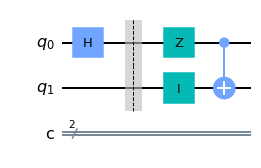

In [8]:
Q = QuantumCircuit(2,2)
numbers = gate_params()
Q.h(0)
Q.barrier()
# attach gates 
Q = attach_gates(Q,numbers)
Q.cnot(0,1)
Q.draw(output='mpl')

# Subtask 3
- The number of total combinations that we would have pertaining to the 2 qubits is 9
- These nine combinations are shown below -

All the possible errors that may occur in the channel :


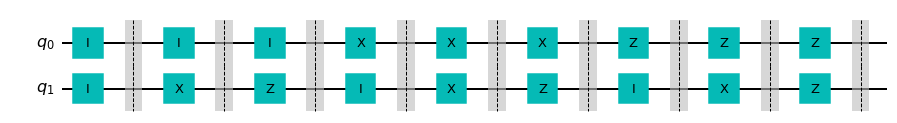

In [11]:
gates = QuantumCircuit(2)
for i in range(1,4):
    for j in range(1,4):
        gates = add_gate(gates,0,i)
        gates = add_gate(gates,1,j)
        gates.barrier()
print("All the possible errors that may occur in the channel :")
gates.draw(output='mpl')

## Observations

### Qubit 1 (control)
- Qubit 1 needs to be corrected for *only phase* flips as the state i.e. |+> for qubit 1 would be affected pertatining to **Z** gate error, as it flips the **relative phase of the bit**, encountered in the channel - $$Z|+\rangle = |-\rangle > correction\ needed$$
- No correction code is required for the bit corresponding to the gate **X** as |+> is actually an eigen state for our gate **X** - $$X|+\rangle = |+\rangle > no\ correction\$$

### Qubit 2 (target)
- Coming on to the Qubit 2, since the state for the qubit is only |0>, no phase correction code is required pertaining to gate **Z** for that qubit, as $$Z|0\rangle=|0\rangle > no\ correction$$ operator has no change for the |0> state. 
- But for **X** gate, the bit flip error correction code must be applied for the Qubit 2 as the gate would actually affect the state |0> by flipping it to |1>, $$X|0\rangle = |1\rangle > correction\ needed$$

# Assumption 
- Although the probabilities corresponding to introduction of noise in the original circuit were produced randomly by **dirichlet function**, a limitation to that approach was that the probabilities of errors can be high.
- For the implementation of the bit-flip and phase-flip codes for correction of one qubit error, the assumption that probability of error is *low* should hold true.
- Pertaining to the point 2, probabilities of X and Z are sampled until there sum is < 0.35 to satisfy the assumption


### Probability function

In [49]:
def get_probabilities():
    '''RETURNS: error probabilities for the qubit channel
    TYPE : dict , key: qubit numbers 
                  value: list of probabilities'''
    p1 = np.random.dirichlet(np.ones(3), size = 1)
    while p1[0][1] + p1[0][2] > 0.35:
        p1 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p1)
    # now pick for second qubit 
    p2 = np.random.dirichlet(np.ones(3), size = 1)
    while p2[0][1] + p2[0][2] > 0.35:
        p2 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p2)
    # probabilities of errors for channel
    return {'q0':p1[0],'q1':p2[0]}

In [294]:
# Getting error probabilities for the qubit 1 and qubit 2
p = get_probabilities()
channel1 = {'X':p['q0'][1],'Z':p['q0'][2]}
channel2 = {'X':p['q1'][1],'Z':p['q1'][2]}
print("For channel1:",channel1)
print("For channel2:",channel2)

Probabilities are : [[0.74437102 0.12532772 0.13030126]]
Probabilities are : [[0.908854   0.07238644 0.01875956]]
For channel1: {'X': 0.12532771726332362, 'Z': 0.13030126216734927}
For channel2: {'X': 0.07238643852988676, 'Z': 0.018759558307878954}


### Noise function
- A thing to note is that attaching *I* operator is **equivalent** to attaching **X for Q1** and **Z for Q2** as *|+> doesn't get affected by X* and *|0> doesn't get affected by Z*


- This assumption is made on the premise that noise was introduced **before** CNOT gate application


- So, the cases when Q1 is affected by *Z* noise and Q2 is affected by *X* noise are handled in the 
**add_channel_noise function**

In [107]:
def add_channel_noise(Q,probs,channel):
    '''PARAMETERS: Q-> QuantumCircuit with 3 quantum and 3 classical bits
                   probs-> a dictionary conatining prob. of error for 
                           channel 2 corresponding to X and Z gates
                   channel-> an interger specifying which channel to add noise
       RETURNS: a Quantum Circuit with randomly attached noise'''
    if(channel == 1):
        p = probs['Z']
    else:
        p = probs['X'] # we only care for the X gate's probability
    
    p0 = (1-p)**3 # probability that no qubit is flipped
    p1 = 3*p*((1-p))**2 # probability that only 1 flip occurs
    
    # note that the action of channel is 
    # equal and independent on each of the three 
    # qubits 
    
    P = [p0,p1] # now pick one of the two possibilities
    choice = random.choices([0,1],weights=P)
    if(channel==1):
        noise = QuantumCircuit(3,3,name='channel1')
    else:
        noise = QuantumCircuit(3,3,name='channel2')

    if(choice[0] == 0): 
        # no qubit flipped
        print("Channel noise",channel)
        noise.i([0,1,2]) # only I gates 
        display(noise.draw(output='mpl'))
        Q.append(noise,noise.qubits,noise.clbits)
        return Q
    else:
        # one qubit flipped
        # weight all three qubits with equal probabilities for flipping
        Qubit = random.choices([0,1,2],weights=[0.333,0.333,0.333])[0]
        if(channel==1):
            noise.z(Qubit)
        else:
            noise.x(Qubit) # flip the qubit
        for k in [0,1,2]:
            if k == Qubit:
                continue
            else:
                noise.i(k)
        print("Channel noise",channel,":")
        display(noise.draw(output='mpl'))
        Q.append(noise,noise.qubits,noise.clbits)
        return Q
    

## Encoding Qubits

### For qubit 1 
- **OBSERVATION** : The errors that will affect the state of the qubit 2 are only ever going to be the errors when a *Z* gate has been introduced erroneously, as said before.
- This implies that only the **phase - flip correction** code needs to be used pertaining to the qubit 1.
- A quantum circuit with 2 ancilla qubits is thus built for the proper 3-bit encoding of the qubit 1 with the noisy channel being the channel 1
- Note that pertaining to our *low probability assumption*, the probability of more than a single qubit phase being flipped is negligible


Channel noise 1


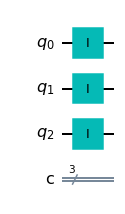

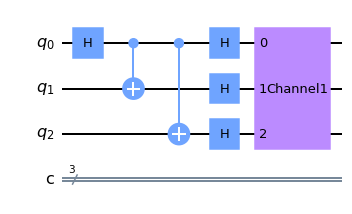

In [289]:
Q1 = QuantumCircuit(3,3)
Q1.h(0)
Q1.cx(0,1)
Q1.cx(0,2)
Q1.h([0,1,2])
Q1 = add_channel_noise(Q1,channel1,1)
Q1.draw(output='mpl')

### For qubit 2
- **OBSERVATION** : The errors that will affect the state of the qubit 2 are only ever going to be the errors when an *X* gate has been introduced erroneously, as said before.
- This implies that only the **bit - flip correction** code needs to be used pertaining to the qubit 2.
- A quantum circuit with 2 ancilla qubits is thus built for the proper 3-bit encoding of the qubit 2 with the noisy channel being the channel 2
- Note that pertaining to our *low probability assumption*, the probability of more than a single qubit being flipped is negligible


Channel noise 2


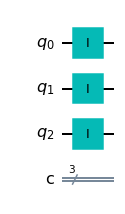

Qubit 2


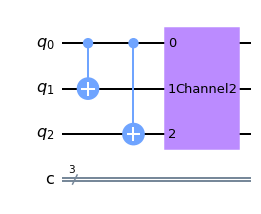

In [290]:
# making the circuit for second bit
Q2 = QuantumCircuit(3,3)
Q2.cx(0,1)
Q2.cx(0,2)
Q2 = add_channel_noise(Q2,channel2,2)
print("Qubit 2")
Q2.draw(output='mpl')

### Encoded Bell State

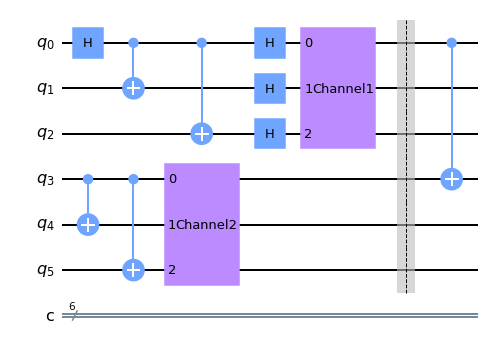

In [291]:
Q = QuantumCircuit(6,6)
Q = Q.compose(Q1,[0,1,2],[0,1,2])
Q = Q.compose(Q2,[3,4,5],[3,4,5])
Q.barrier()
Q.cx(0,3)
Q.draw(output='mpl')


## Correction Circuits 

### Qubit 1

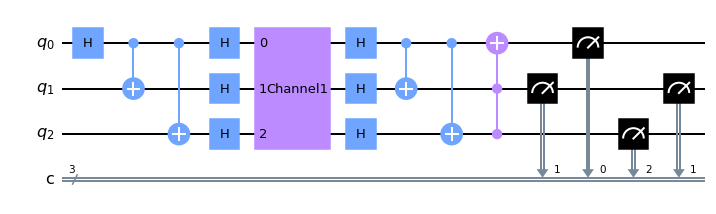

In [201]:
# Attaching measurements and Cx gates to identify which was qubit was flipped incorrectly
Q1.h([0,1,2])
Q1.cx(0,1)
Q1.cx(0,2)
Q1.ccx(1,2,0)
Q1.measure([1,0],[1,0])
Q1.measure([1,2],[1,2])
Q1.draw(output='mpl')

### Qubit 2

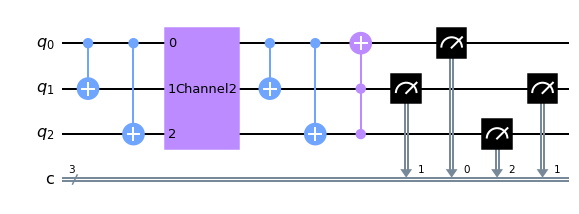

In [202]:
# Attaching measurements and Cx gates to get which qubit was flipped incorrectly
Q2.cx(0,1)
Q2.cx(0,2)
Q2.ccx(1,2,0)
Q2.measure([1,0],[1,0])
Q2.measure([1,2],[1,2])
Q2.draw(output='mpl')

### For Bell State


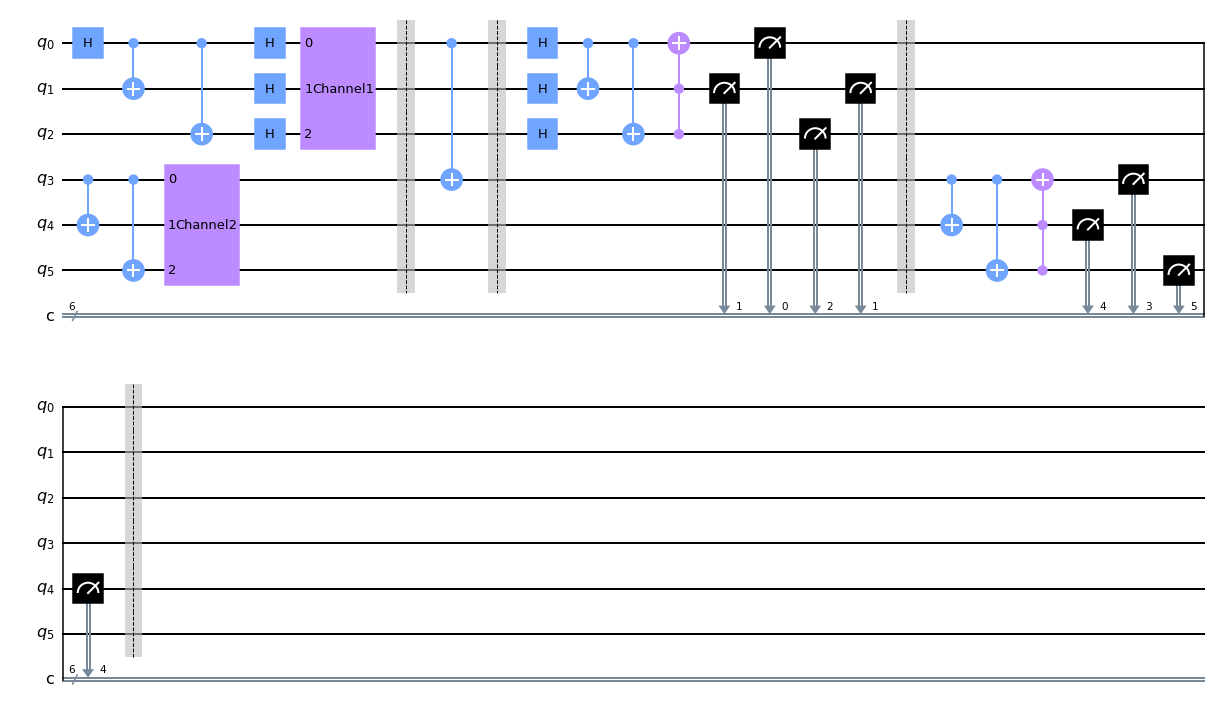

In [292]:
Q.barrier()
# for qubit 1 
Q.h([0,1,2])
Q.cx(0,1)
Q.cx(0,2)
Q.ccx(1,2,0)
# Q.measure(0,0)
Q.measure([1,0],[1,0])
Q.measure([1,2],[1,2])
Q.barrier()
# for qubit 2 
Q.cx(3,4)
Q.cx(3,5)
Q.ccx(4,5,3)
# Q.measure(3,3)
Q.measure([4,3],[4,3])
Q.measure([4,5],[4,5])
Q.barrier()
Q.draw(output='mpl')

## Correcting procedure
- Since the qiskit notation is **big endian**, the most significant bit pertains to Q2 and least significant bit pertains to Q0.
- Separate procedures are employed for the qubit 0 and qubit 3(the second qubit)
- Note that **step by step syndrome measurements are required** for identification of the errors 


### Qubit 1
- A correction procedure corresponding to projective measurements - 
    // to do...

### Qubit 2
- A correction procedure to the corresponding projective measurements(Q3,Q4,Q5) -
$$ |000\rangle : no\ correction\ required\$$

$$ |100\rangle\ and\ |011\rangle: X\ gate\ on\ qubit2$$

$$ |010\rangle\ and\ |101\rangle: X\ gate\ on\ qubit1$$

$$ |110\rangle : X\ gate\ on\ qubit\ 0\$$
- The last error happened due to the flip of the actual logical qubit. The **toffoli gate** at the end although corrected it, but the **CNOTs** changed the states of Q4 and Q5 which need to be flipped.
- Note that these measurements actually preserve our superposition(if present) as we are only querying for which bits are different from each other, not the whole state
- Now a correction is applied over our circuit to get back the results

In [38]:
## NEED TO CHANGE


# qubit = list(counts.keys())[0]
# if '1' not in str(qubit):
#     # no flip occured
#     qubit = None
# else:
#     qubit_ind = []
#     for i,k in enumerate(qubit):
#         if k == '1':
#             qubit_ind.append(2-i) # big endian and hence needs to be n - i
# print("Qubit :",qubit_ind," needs to be flipped")

Qubit : [1]  needs to be flipped


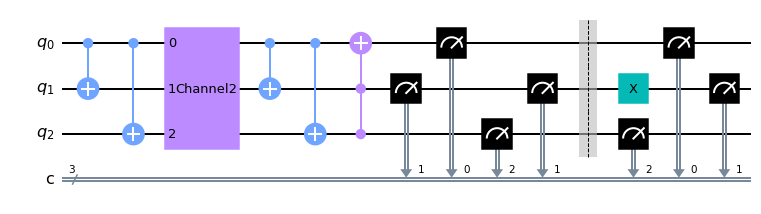

In [39]:
Q2.barrier()
if(qubit is not None):
    for k in qubit_ind:
        Q2.x(k)
Q2.measure([0,1,2],[0,1,2])
Q2.draw(output='mpl')

## Putting it all together 
- We would require 2 ancilla qubits for the qubit 1 and 2 for qubit 2.
- The given circuit it just a compilation of the above process just before applying the CNOT gate and getting our Bell State after it has gone through the noisy channel.
- After we apply the correcting procedures and measure the state back, we would be getting the Bell State back indeed.
// to do